<a href="https://colab.research.google.com/github/AnnaAleynik/machine_learning/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.colors as mcolors

Находим общий центр тяжести. Использвуя его и окружность, находим центроиды. Строим вокруг каждого кластер: определяем для каждой точки ближайший центроид.
Для каждого кластера повторяем, сдвигаем центроиды, пересчитываем ближайшие



---



In [2]:
def random_points(n):
  points = []
  points = make_blobs(n)
  return points[0]

In [3]:
def dist(point1, point2):
  return np.sqrt((point1[0]-point2[0])**2 +(point1[1]-point2[1])**2)

In [4]:
def draw(points, color):
  plt.scatter(points[:,0], points[:,1], color=color)
  plt.draw()
  # plt.pause(.001)

In [5]:
def draw_centroids(points):
  xs = []
  ys = []
  for i in points:
    xs.append(i[0])
    ys.append(i[1])
  plt.scatter(xs, ys, color='black', marker="+")
  plt.draw()
  # plt.pause(.001)


In [6]:
def draw_clusters(clusters):
  COLORS = list(mcolors.CSS4_COLORS.values())
  colors = ['red','green','yellow','magenta','cyan','grey','#f03a09']

  for key, value in clusters.items():
    xs = []
    ys = []
    for i in value:
      xs.append(i[0])
      ys.append(i[1])
    plt.scatter(xs, ys, color=colors[key])
    plt.draw()

In [7]:
def init_centroids(points, cluster_count):
  x_avg = 0
  # x_avg = np.average(points[:,0])
  y_avg = 0
  # y_avg = np.average(points[:,1])

  for i in points:
      x_avg += i[0]
      y_avg += i[1]
  x_avg = x_avg / len(points)
  y_avg = y_avg / len(points)

  R = 0
  for i in range(len(points)): 
      distance = dist(points[i], [x_avg, y_avg]) 
      if R < distance: 
          R = distance 
  centroids = []
  for i in range(cluster_count): 
      x_c = R * np.cos(2 * np.pi * i / cluster_count) + x_avg
      y_c = R * np.sin(2 * np.pi * i / cluster_count) + y_avg
      centroids.append([x_c, y_c]) 
  return centroids

In [8]:
def centroid(points):
  x_avg = 0
  # x_avg = np.average(points[:,0])
  y_avg = 0
  # y_avg = np.average(points[:,1])

  for i in points:
    x_avg += i[0]
    y_avg += i[1]
  x_avg = x_avg / len(points)
  y_avg = y_avg / len(points)

  return [x_avg, y_avg] 

In [9]:
# clusters = {
#     0: [[0,0], [0,1]],
#     1: [[1,0], [1,1]]
# }
def nearest_centroids(points, centroids):
  clusters = {} 
  for i in range(len(centroids)): 
      clusters[i] = []
  
  for i in range(len(points)): 
      points_range = [] 
      for j in range(len(centroids)):
          points_range.append(dist(points[i], centroids[j])) 
      index = points_range.index(min(points_range))
      clusters[index].append(points[i]) 
  return clusters 


Для каждого кластера найти новый центроид. Найти ближайший новый центроид для каждой точки, отследить переход точки в новый кластер или закрепление точки в кластере. Повторять, пока не будет переходов.

Потом нужно найти опитмальный k.

Пока новые центры для каждой точки не будут повторяться


In [10]:
def compare_clusters(centroids, new_centroids,clusters, new_clusters):
  for i in range(len(new_centroids)):
    if new_centroids[i] != centroids[i]:
      return False
  for key in clusters.keys():
    if np.allclose(clusters[key], new_clusters[key]) == False:
      return False
  return True

In [15]:
def sum_dist_points_clusters(centroids, clusters):
  sum_dist = 0
  for key, value in clusters.items():
    for point in value:
      sum_dist += dist(centroids[key], point)
  return sum_dist

In [18]:
def sum_distance_by_cluster_count(points):
  sum_distances = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
  for k in range(1, 6):
    centroids = init_centroids(points, k)
    clusters = nearest_centroids(points, centroids)

    if [] in clusters.values():
      return sum_distances

    prev_centroids = centroids
    prev_clusters = clusters

    centroids = []
    for key, value in clusters.items():
      centroids.append(centroid(value))
    clusters = nearest_centroids(points, centroids)

    while compare_clusters(prev_centroids, centroids, prev_clusters, clusters) == False:
      prev_centroids = centroids
      prev_clusters = clusters

      centroids = []
      for key, value in clusters.items():
        centroids.append(centroid(value))
      clusters = nearest_centroids(points, centroids)
    sum_distances[k] = sum_dist_points_clusters(centroids, clusters)
  return sum_distances

In [13]:
def optimal_cluster_count(distances):
  min_d = 10000
  min_key = 0

  if len(distances.keys()) < 5:
    return len(distances.keys())

  for key in distances.keys():
    if key == 1 or key == len(distances.keys()):
      continue 
    d = (abs(distances[key] - distances[key+1]))/(abs(distances[key-1] - distances[key]))
    if d < min_d:
      min_d = d
      min_key = key
  return min_key

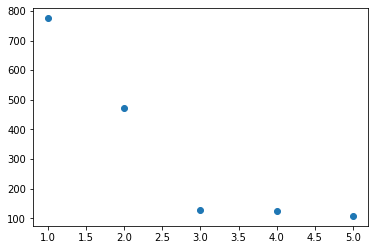

Cluster count:  3


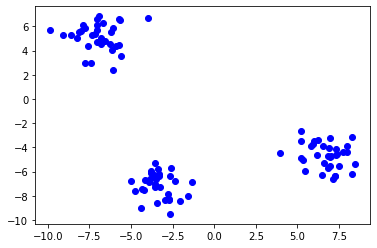

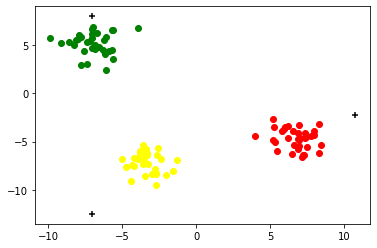

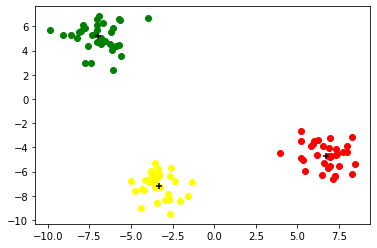

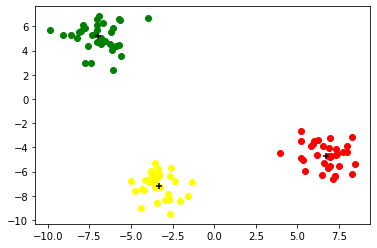

In [19]:
N = 100

points = random_points(N)

points = random_points(100)
distances = sum_distance_by_cluster_count(points)
plt.scatter(distances.keys(), distances.values())
plt.show()

k = optimal_cluster_count(distances)
print("Cluster count: ", k)
centroids = init_centroids(points, k)
draw(points, 'blue')
plt.show()
clusters = nearest_centroids(points, centroids)

draw_clusters(clusters)
draw_centroids(centroids)
plt.show()

prev_centroids = centroids
prev_clusters = clusters

centroids = []


for key, value in clusters.items():
  centroids.append(centroid(value))
clusters = nearest_centroids(points, centroids)
draw_clusters(clusters)
draw_centroids(centroids)
plt.show()

i = 0
while compare_clusters(prev_centroids, centroids, prev_clusters, clusters) == False:

  i += 1
  prev_centroids = centroids
  prev_clusters = clusters

  centroids = []
  for key, value in clusters.items():
    centroids.append(centroid(value))
  clusters = nearest_centroids(points, centroids)
  draw_clusters(clusters)
  draw_centroids(centroids)
  plt.show()
